In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("insurance_part2_data-2.csv")

In [3]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [5]:

for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 111.5 KB


In [7]:
from sklearn.model_selection import train_test_split

In [9]:
y = df['Claimed']
x = df.drop(['Claimed'], axis=1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.30, random_state=27)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
sc = StandardScaler()

In [13]:
x_train = sc.fit_transform(x_train)

In [14]:
x_train

array([[ 0.94942265,  1.70011206, -1.24068476, ..., -0.59927519,
        -1.3122342 , -0.42515951],
       [-0.39558896, -1.30260899, -1.24068476, ..., -0.62679493,
        -1.3122342 , -0.42515951],
       [ 0.75727814, -0.30170197,  0.80600652, ...,  0.2428288 ,
         0.25751335,  1.34986032],
       ...,
       [ 0.75727814,  0.69920504,  0.80600652, ..., -0.65431467,
        -0.52736043, -0.42515951],
       [-0.20344444,  0.69920504,  0.80600652, ..., -0.53047585,
         0.25751335, -0.42515951],
       [ 1.91014523, -1.30260899, -1.24068476, ..., -0.62679493,
        -1.3122342 , -0.42515951]])

In [15]:
x_test = sc.transform(x_test)

In [16]:
x_test

array([[ 3.15908459, -1.30260899, -1.24068476, ...,  0.14375774,
        -1.3122342 , -0.42515951],
       [-0.2995167 , -1.30260899, -1.24068476, ...,  3.16748898,
         1.82726089, -0.42515951],
       [-1.26023928,  0.69920504,  0.80600652, ..., -0.70935415,
        -0.52736043, -0.42515951],
       ...,
       [-0.20344444,  0.69920504,  0.80600652, ...,  0.32263604,
         0.25751335,  3.12488015],
       [ 1.71800072, -1.30260899, -1.24068476, ..., -0.59927519,
        -1.3122342 , -0.42515951],
       [ 0.27691685,  0.69920504,  0.80600652, ..., -0.51671598,
         0.25751335, -0.42515951]])

In [17]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000,
                     solver='sgd', verbose=True,  random_state=21,tol=0.001)

In [27]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64616639
Iteration 2, loss = 0.63108907
Iteration 3, loss = 0.61333009
Iteration 4, loss = 0.59812948
Iteration 5, loss = 0.58458192
Iteration 6, loss = 0.57351713
Iteration 7, loss = 0.56426161
Iteration 8, loss = 0.55654076
Iteration 9, loss = 0.54983399
Iteration 10, loss = 0.54426075
Iteration 11, loss = 0.53948364
Iteration 12, loss = 0.53531789
Iteration 13, loss = 0.53161481
Iteration 14, loss = 0.52837625
Iteration 15, loss = 0.52563122
Iteration 16, loss = 0.52311650
Iteration 17, loss = 0.52096152
Training loss did not improve more than tol=0.010000 for 10 consecutive epochs. Stopping.


In [19]:
from sklearn.metrics import confusion_matrix,classification_report

In [20]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[613,  37],
       [167,  83]], dtype=int64)

In [21]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train,pred2)

array([[1348,   78],
       [ 458,  216]], dtype=int64)

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       650
           1       0.69      0.33      0.45       250

    accuracy                           0.77       900
   macro avg       0.74      0.64      0.65       900
weighted avg       0.76      0.77      0.74       900



In [23]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.75      0.95      0.83      1426
           1       0.73      0.32      0.45       674

    accuracy                           0.74      2100
   macro avg       0.74      0.63      0.64      2100
weighted avg       0.74      0.74      0.71      2100



In [24]:
import matplotlib.pyplot as plt

AUC: 0.796


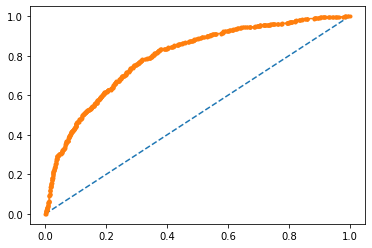

In [25]:
# AUC and ROC for the training data

# predict probabilities
probs = clf.predict_proba(x_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.799


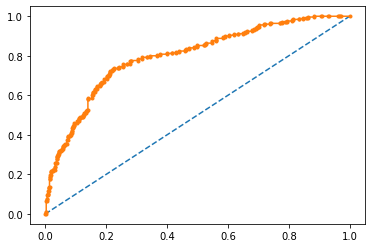

In [26]:
# AUC and ROC for the test data

# predict probabilities
probs = clf.predict_proba(x_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()